# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías 
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def cargar_archivos_con_separadores(archivos_con_separadores):
    """
    Carga múltiples archivos CSV con separadores específicos para cada archivo y los almacena en un diccionario de DataFrames.
    
    :param archivos_con_separadores: Diccionario donde las claves son los nombres de los archivos y los valores son los separadores.
    :return: Diccionario con nombres de archivos como claves y DataFrames como valores.
    """
    df = {}  # Objeto que almacenará los DataFrames

    # Iterar sobre los archivos y sus separadores
    for archivo_nombre, separador in archivos_con_separadores.items():
        url_no_windows = '/datasets/' + archivo_nombre
        url_windows = 'datasets/' + archivo_nombre
        
        try:
            # Intentar cargar desde la ruta no-Windows
            if os.path.exists(url_no_windows):
                df[archivo_nombre] = pd.read_csv(url_no_windows, sep=separador, dtype={'votes': 'Int64'})
                print(f"Archivo cargado exitosamente desde '{url_no_windows}'")
            
            # Intentar cargar desde la ruta Windows
            elif os.path.exists(url_windows):
                df[archivo_nombre] = pd.read_csv(url_windows, sep=separador, dtype={'votes': 'Int64'})
                print(f"Archivo cargado exitosamente desde '{url_windows}'")
            
            else:
                raise FileNotFoundError(f"Error: el archivo '{archivo_nombre}' no se encuentra en ninguna de las rutas especificadas.")
        
        except FileNotFoundError as e:
            print(e)
        
        except pd.errors.ParserError as e:
            print(f"Error al procesar el archivo CSV '{archivo_nombre}': {e}")
        
        except Exception as e:
            print(f"Ha ocurrido un error inesperado con el archivo '{archivo_nombre}': {e}")

    return df

# Ejemplo de uso
archivos_con_separadores = {
    'instacart_orders.csv': ';',  
    'products.csv': ';',       
    'aisles.csv': ';',       
    'departments.csv': ';',       
    'order_products.csv': ';',       
}

# Cargar los archivos en el objeto df
df = cargar_archivos_con_separadores(archivos_con_separadores)

df_instacart_orders = df['instacart_orders.csv']
df_products = df['products.csv']
df_aisles = df['aisles.csv']
df_departments = df['departments.csv']
df_order_products = df['order_products.csv']

Archivo cargado exitosamente desde 'datasets/instacart_orders.csv'
Archivo cargado exitosamente desde 'datasets/products.csv'
Archivo cargado exitosamente desde 'datasets/aisles.csv'
Archivo cargado exitosamente desde 'datasets/departments.csv'
Archivo cargado exitosamente desde 'datasets/order_products.csv'


In [3]:
# mostrar información del DataFrame
print(list(df_instacart_orders.columns))
print()
df_instacart_orders.info()

['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
print(list(df_products.columns))
print()
df_products.info()

['product_id', 'product_name', 'aisle_id', 'department_id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
print(list(df_aisles.columns))
print()
df_aisles.info()

['aisle_id', 'aisle']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
print(list(df_departments.columns))
print()
df_departments.info()

['department_id', 'department']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
# mostrar información del DataFrame
print(list(df_order_products.columns))
print()
df_order_products.info()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

___En primera instacia se puede observar que al cargar los datos desde los repositorios .csv, los delimitadores son ';'
de igual manera se aprecia que existen columnas con un dataType que no coincide o pertenezca a la semantaica del nombre de la columna.___

___Existen valores ausentes en las tablas___


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1. __Verificar si las columnas que sean usadas como identificador ('Id') sean del tipo intenger y si no es asi hacer la  conversion de los datos a ese tipo, verificando que si en dado caso que se necesite cmabiar a tipo integer, verificar que este cambio no afecte a los datos.__


2. ___Verificar que no existan valores ausententes con alguna nos permita saber la cantidad de valores ausentes en alguna columna dada, por ejemplo '.isna().sum()'.___



3. ___Verificar que no existan valores o filas con datos duplicados con alguna funcion, por ejemplo '.drop_duplicates()'. ___

<strong>Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).</strong> 

In [8]:


#funcion is_int, que verifica si las columanas que contengan en su nombre la palabra 'id' son del tipo int
def is_int(data):
    try:
        print("------------------")
        for column in data:
            if 'id' in column.lower():
                print('Nombre de la columna: ', column.lower(), 'es del tipo: ',data[column].dtype)
                if(data[column].dtype != 'int64'):
                    print('Modificar el tipo de dato de la columna')
        print("------------------")
    except Exception as err: 
        print("------------------")
        print(f"Unexpected {err=}, {type(err)=}")
        print("------------------")
        return NameError
     

is_int(df_instacart_orders)
is_int(df_products)
is_int(df_aisles)
is_int(df_departments)
is_int(df_order_products)

------------------
Nombre de la columna:  order_id es del tipo:  int64
Nombre de la columna:  user_id es del tipo:  int64
------------------
------------------
Nombre de la columna:  product_id es del tipo:  int64
Nombre de la columna:  aisle_id es del tipo:  int64
Nombre de la columna:  department_id es del tipo:  int64
------------------
------------------
Nombre de la columna:  aisle_id es del tipo:  int64
------------------
------------------
Nombre de la columna:  department_id es del tipo:  int64
------------------
------------------
Nombre de la columna:  order_id es del tipo:  int64
Nombre de la columna:  product_id es del tipo:  int64
------------------


___Con esto verificamos que todas las columnas Id son del tipo integer___

___Se encontro que en 3 de las tablas, existe valores ausentes.
Se enlistan a continuacion:___

| tabla  | columna  | numero de datos ausentes |
|:----------|:----------|:----------:|
| df_instacart_orders   | days_since_prior_order   | 28819   |
| df_products    | product_name   | 1258   |
| df_order_products    | add_to_cart_order   | 836   |


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
# Contar duplicados
def duplicados(data):
    numero_duplicados = data.duplicated().sum()
    if (numero_duplicados > 0):
        print('Existen ',numero_duplicados,' datos duplicados')
    else:
        print('No hay datos duplicados')
        
def duplicados_columna(data,columna): 
    numero_duplicados = data[columna].duplicated().sum()
    if (numero_duplicados > 0):
        print('Existen ',numero_duplicados,' datos duplicados en la columna ',columna)
    else:
        print('No hay datos duplicados en la columna `',columna,'`')

duplicados(df_instacart_orders)

Existen  15  datos duplicados


In [10]:
df1 = df_instacart_orders[df_instacart_orders.duplicated(keep=False)]
print (df1)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si hay pedidos que tienen lineas duplicadas y asi mismo los valores duplicados tienen en comun:
1. se realizaron el mismo dia de la semana
2. se realizaron a la misma hora


In [11]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
#pedidos_realizados = df_instacart_orders.query("order_dow  == 3")
pedidos_realizados = df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]
print(pedidos_realizados)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

___Sugiere que ha una tendencia de compra los dias miercoles a las 2 de la mañana___

In [12]:
# Elimina los pedidos duplicados
print(df_instacart_orders.drop_duplicates(inplace=True))

None


In [13]:
# Vuelve a verificar si hay filas duplicadas
numero_duplicados = df_instacart_orders.duplicated().sum()
if (numero_duplicados > 0):
    print('Existen ',numero_duplicados,' datos duplicados')
else:
    print('No hay datos duplicados')

No hay datos duplicados


In [14]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicados_columna(df_instacart_orders,'order_id')


No hay datos duplicados en la columna ` order_id `


Describe brevemente tus hallazgos y lo que hiciste con ellos

___Al estar verificando los datos, especificamente si existian datos dupliados, se pudo observar que habia un dia y hora de la semana que tenian en comun estos datos, datos que nos podria servir mas adelante para analizar alguna tendencia o responder un por que hay un compra en ese dia y horario en especifico para posteriormente realizar predicciones.___

___Una vez relizada esta observacion se eliminaron los datos duplicados y se verifico que no siguieran existiendo.___

### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas
duplicados(df_products)

No hay datos duplicados


In [16]:
# Revisa únicamente si hay ID de departamentos duplicados
duplicados_columna(df_products,'department_id')

Existen  49673  datos duplicados en la columna  department_id


In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print('-- con los valores de los nombres originales')
duplicados_columna(df_products,'product_name')
print()
print('-- con los valores de los nombres en mayusculas')
df_products['product_name'] = df_products['product_name'].str.upper()
duplicados_columna(df_products,'product_name')


-- con los valores de los nombres originales
Existen  1257  datos duplicados en la columna  product_name

-- con los valores de los nombres en mayusculas
Existen  1361  datos duplicados en la columna  product_name


In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_products[df_products['product_name'] != df_products['product_name'].isna()].duplicated().sum())

0


no hay valores duplicados en los nombres de productos no faltantes

Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. ___Se verifico que no existieran valores duplicados en la tabla de productos___


2. ___Existen valores duplicados en los id de los departamentos de la tabla productos___


3. ___Al realizar la verificacion de valores duplicados en los nombres de los producos, en una primera instancia podemos observar que hay valores y posterior a eso pasamos todos los nombres de los prodcutos a mayuscalas, se puede observar que todavia existian mas valores duplicados___


### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
duplicados(df_departments)

No hay datos duplicados


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicados_columna(df_departments,'department_id')

No hay datos duplicados en la columna ` department_id `


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. se reviso los datos duplicados y no se encontro alguno.
2. no existen datos dupliacados en el id del departamento

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
duplicados(df_aisles)

No hay datos duplicados


In [22]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicados_columna(df_aisles,'aisle_id')

No hay datos duplicados en la columna ` aisle_id `


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. se reviso los datos duplicados y no se encontro alguno.
2. no existen datos dupliacados en el id del pasillo

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
duplicados(df_order_products)

No hay datos duplicados


In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicados_columna(df_order_products,'order_id')
duplicados_columna(df_order_products,'product_id')
duplicados_columna(df_order_products,'add_to_cart_order')
duplicados_columna(df_order_products,'reordered')


Existen  4094961  datos duplicados en la columna  order_id
Existen  4499434  datos duplicados en la columna  product_id
Existen  4544942  datos duplicados en la columna  add_to_cart_order
Existen  4545005  datos duplicados en la columna  reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. se reviso los datos duplicados y no se encontro alguno.
2. existen datos duplicados en:
    1. order_id  que identifica de manera unica cada pedido
    2. product_id identifica de manera unica cada producto
    3. add_to_cart_order indica el orden en que se añadio al carrito
    4. reordered indica si el cliente ya a pedido este articulo con anterioridad
    
se puede observar que hay productos populares o con mayor venta con respecto a otros

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'
#print("------------------------------------------------------------------------")
#print('table df_instacart_orders ')
#print(df_instacart_orders.isna().sum())
print("------------------------------------------------------------------------")
print('table df_products ')
print(df_products.isna().sum())
print("------------------------------------------------------------------------")
#print('table df_aisles ')
#print(df_aisles.isna().sum())
#print("------------------------------------------------------------------------")
#print('table df_departments ')
#print(df_departments.isna().sum())
#print("------------------------------------------------------------------------")
#print('table df_order_products ')
#print(df_order_products.isna().sum())
#print("------------------------------------------------------------------------")

------------------------------------------------------------------------
table df_products 
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
------------------------------------------------------------------------


Describe brevemente cuáles son tus hallazgos.

___Se encontro que al analizar la tabla productos se encontro que solo en la columna 'product_name' existen valores ausentes___


In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

print(df_products[(df_products['aisle_id'] == 100) & (df_products['product_name'].isna())])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

___Se encontro que todos los productos ausentes relacionados con el pasillo con id 100___

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[(df_products['department_id'] == 21) & (df_products['product_name'].isna())])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

___Se encontro que todos los productos ausentes estan relacionados con el departamento con id 21___

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


#df_aisles = pasillos
#df_departments = departamentos

print("------------------------------------------------------------------------")
print("-- pasillo con id = 100")
print(df_aisles[(df_aisles['aisle_id'] == 100)])
print("------------------------------------------------------------------------")
print("-- departamento con id = 21")
print(df_departments[(df_departments['department_id'] == 21)])
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
-- pasillo con id = 100
    aisle_id    aisle
99       100  missing
------------------------------------------------------------------------
-- departamento con id = 21
    department_id department
20             21    missing
------------------------------------------------------------------------


Describe brevemente cuáles son tus hallazgos.

- En la tabla de pasillos, el nombre depasillo con el id = 100 esta vacio o ausente.
- En la tabla de departamentos, el nombre de departamento con el id = 21 esta vacio o ausente

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'


#Funcion que realiza el llenado de valores ausentes por el string unknown
def fillnaValues(dataFrame,columns_to_replace):
    try:
        print("------------------")
        for col in columns_to_replace: 
            dataFrame[col].fillna('unknown', inplace=True)
        print("------------------")
        print("Se completo el llenado de datos vacios")
        print()
    except Exception as err: 
        print("------------------")
        print(f"Unexpected {err=}, {type(err)=}")
        print("------------------")
        return NameError
    

#llamamos a la funcion fillnaValues para llenar los valores ausentes
fillnaValues(df_products,['product_name'])


#fillnaValues(df_instacart_orders,['days_since_prior_order'])
#fillnaValues(df_order_products,['add_to_cart_order'])


------------------
------------------
Se completo el llenado de datos vacios



Describe brevemente tus hallazgos y lo que hiciste con ellos.

___Se realizo una busqueda en la columna 'product_name' de valores ausentes en la tabla de productos,
y posteriormente se realizo un llenao de ellos con el valor de 'unknown'.___

### `orders` data frame

In [30]:
# Encuentra los valores ausentes 

# de la tabla instacart_orders
print("------------------------------------------------------------------------")
print('table df_instacart_orders ')
print(df_instacart_orders.isna().sum())
print("------------------------------------------------------------------------")

------------------------------------------------------------------------
table df_instacart_orders 
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64
------------------------------------------------------------------------


In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


___No, solo existen valores ausentes en la comlumna 'days_since_prior_order'___

Describe brevemente tus hallazgos y lo que hiciste con ellos.

___Se realizo una busqueda de valores ausentes en la tabla 'orders' o "instacart_orders" y se econtro  que en la columna days_since_prior_order existen datos ausentes, que son los dias trasncurridos desde la orden anterior.___

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
print("------------------------------------------------------------------------")
print('table df_order_products ')
print(df_order_products.isna().sum())
print("------------------------------------------------------------------------")


------------------------------------------------------------------------
table df_order_products 
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
------------------------------------------------------------------------


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('minimo =',df_order_products['add_to_cart_order'].min())
print('maximo =',df_order_products['add_to_cart_order'].max())

minimo = 1.0
maximo = 64.0


Describe brevemente cuáles son tus hallazgos.


___ podemos deducir con los valores maximos yminos que, hay clienes que su ultima compra fue hace 1 dia,___

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order' 
 
#obtenemos todos los registros de valores ausentes de la columna 'add_to_cart_order' y los guardamos en df_filtered
df_filtered = df_order_products[df_order_products['add_to_cart_order'].isna()]

#obtenemos solo los IDs de la variable 'df_filtered'
df_filtered = df_filtered.loc[:,'order_id']

print(df_filtered)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

In [36]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_filtered = df_order_products[df_order_products['add_to_cart_order'].isna()]

print('Valor minimo:',df_filtered.groupby(['order_id'])['product_id'].count().min())
print('Valor maximo:',df_filtered.groupby(['order_id'])['product_id'].count().max())

Valor minimo: 1
Valor maximo: 63


¿Todos los pedidos con valores ausentes tienen más de 64 productos?

___No, el maximo de productos es 64, en los pedidos ausentes___

Describe brevemente cuáles son tus hallazgos.

___Se observo que en el orden en que se añadio el producto al carrito de compras 'add_to_cart_order', presenta valores ausentes y que de estos mismos, existen pedidos realizados con no mas de 63 prodcutos por compra.___

In [37]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
#Funcion que realiza el llenado de valores ausentes por 999
def fillnaValues(dataFrame,columns_to_replace):
    try:
        print("------------------")
        for col in columns_to_replace: 
            dataFrame[col].fillna(999, inplace=True)
        print("------------------")
        print("Se completo el llenado de datos vacios")
        print()
    except Exception as err: 
        print("------------------")
        print(f"Unexpected {err=}, {type(err)=}")
        print("------------------")
        return NameError

fillnaValues(df_order_products,['add_to_cart_order'])
print('------------------------------------------------')

print()
print()
df_order_products.info()

df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].apply(int)

print('------------------------------------------------')
print()
print()
df_order_products.info()


------------------
------------------
Se completo el llenado de datos vacios

------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

___Se remplazaron los datos ausentes de la columna 'add_to_cart' con el valor de 999 y posteriormente se hizo la conversion de de datos de tipo float a tipo intenger de la misma columa.___

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

___como conclusión de los datos analizados de las 5 tablas se pudo observar lo siguiente:___
- Existen datos faltantes en las tablas.
- El tipo de dato de algunas columnas no es el adecuado.
- Existen datos duplicados.
- Hay conjunto notabe de compras que se realizaron el dia mericoles a las 2:00 hrs.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [38]:
#order_hour_of_day
display(df_instacart_orders['order_hour_of_day'].describe())

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [39]:
display(df_instacart_orders['order_dow'].describe())

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

Escribe aquí tus conclusiones

___los valores de las columnas 'order_hour_of_day' y 'order_dow' se encuentran en rangos razonables___

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

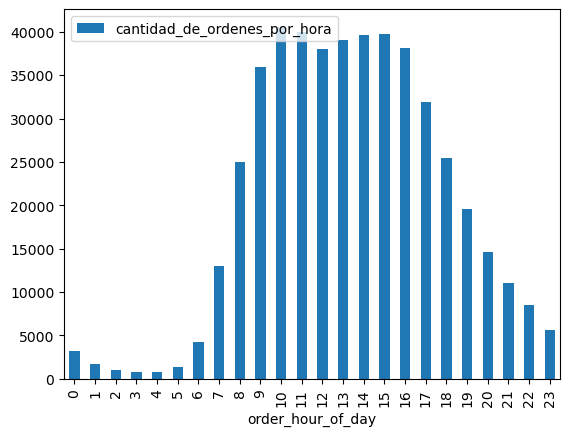

In [40]:
cantidad_de_ordenes_por_hora = df_instacart_orders.groupby('order_hour_of_day')['order_id'].count()
cantidad_de_ordenes_por_hora.plot(kind='bar') 
plt.legend(['cantidad_de_ordenes_por_hora'])
plt.show()


Escribe aquí tus conclusiones

- El hora del dia con mayor ventas son las 10 de la mañana
- El horario del dia con menor ventas son las 4 de la mañana

### [A3] ¿Qué día de la semana compran víveres las personas?

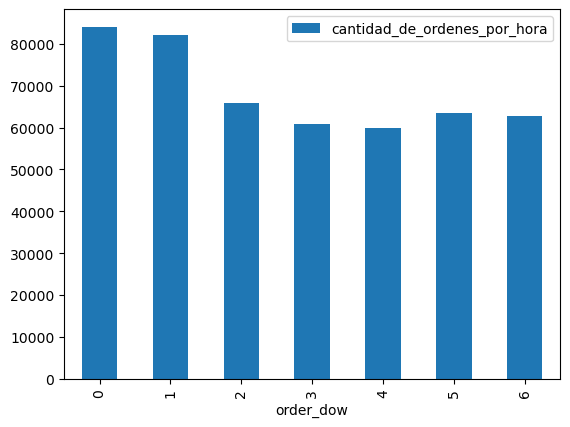

In [41]:
cantidad_de_ordenes_por_dia = df_instacart_orders.groupby('order_dow')['order_id'].count()

cantidad_de_ordenes_por_dia.plot(kind='bar') 
plt.legend(['cantidad_de_ordenes_por_hora'])
plt.show()

Escribe aquí tus conclusiones

__El dia de la sema con menor indice de compras es el jueves y
el dia de mayor compras en la semana es el domingo__

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

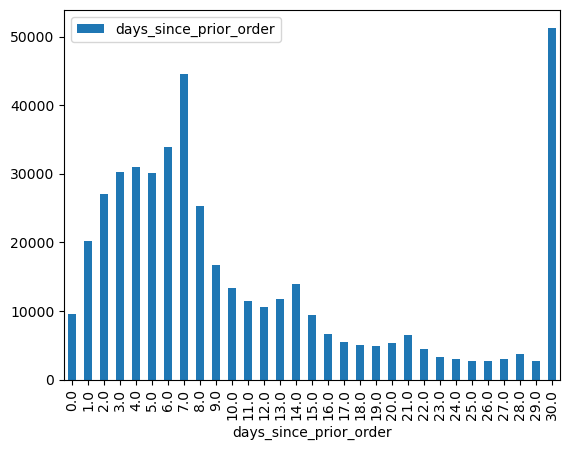

In [42]:
tiempo_de_espera = df_instacart_orders.groupby('days_since_prior_order')['order_dow'].count()

tiempo_de_espera.plot(kind='bar') 
plt.legend(['days_since_prior_order'])
plt.show()

Escribe aquí tus conclusiones

__los clientes realizan una nueva compra cada mes.__

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

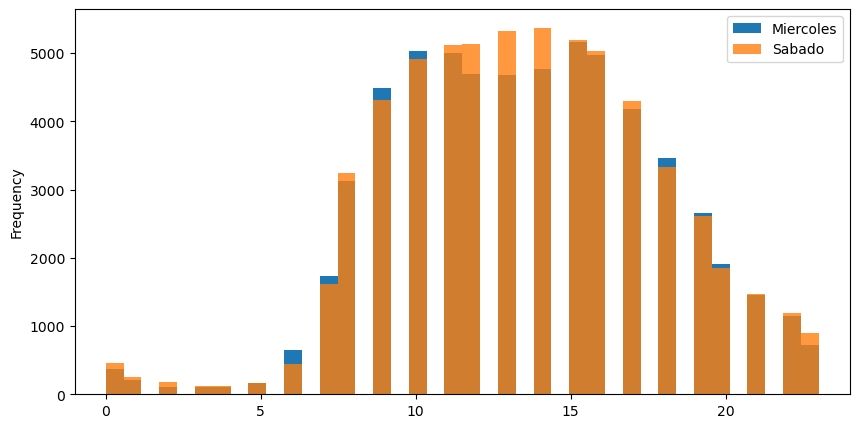

In [43]:
from matplotlib import pyplot as plt
#order_hour_of_day 3 y 6
miercoles = df_instacart_orders[(df_instacart_orders['order_dow'] == 3)]['order_hour_of_day']
sabado = df_instacart_orders[(df_instacart_orders['order_dow'] == 6)]['order_hour_of_day']

plt.figure(figsize=(10,5))
plt.xlim(-1,24)
miercoles.plot(kind='hist',bins=40)
sabado.plot(kind='hist',bins=40,alpha=0.8)

plt.legend(['Miercoles', 'Sabado'])
plt.show()

Escribe aquí tus conclusiones

__Como se muestra en el histograma, en la comparacion de los dias miercoles y sabado con respecto a las ventas del dia, podemos observa que en ambos dias las horas de ventas son muy parecidas, en donde si podemos observar alguna diferencia significativa, es entre las 13 y 14 horas, donde para el sabado es el mejor horario en ventas y para el miercoles se denota una deceso en sus ventas, para posteriormente el dia miercoles va a igualar al dia sabado apartir de las 15 horas.__

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

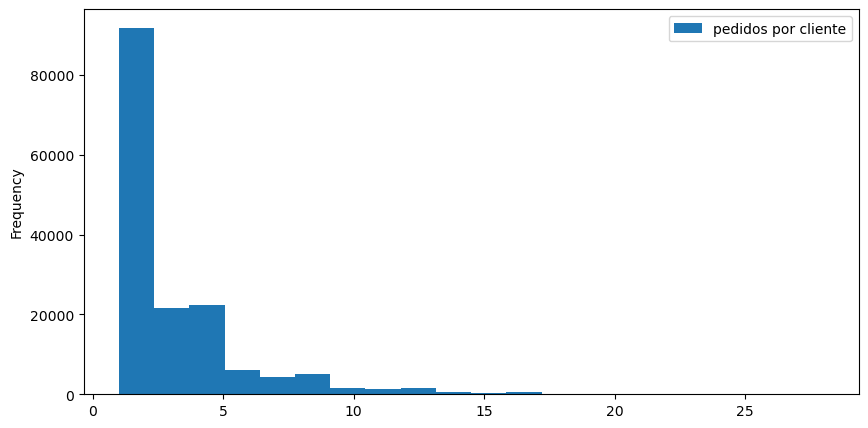

In [44]:
grp = df_instacart_orders.groupby(['user_id'])
distribucion = grp['order_id'].count()

plt.figure(figsize=(10,5))
distribucion.plot(kind='hist',bins=20 )
plt.legend(['pedidos por cliente'])
plt.show()

Escribe aquí tus conclusiones

___Principalmente los clientes solo hacen 1 sola compra___
__el conjunto de clientes que realizan una compra decrece exponencialemne con respecto a la siguiente compra__

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
merge_data = df_order_products.merge(df_products, on='product_id', how='left')
new_data = merge_data.groupby(['product_id','product_name'])['product_id'].count()\
                            .reset_index(name='count')\
                            .sort_values(['count'], ascending=False)\
                            .head(20)
display(new_data.loc[:,['product_id','product_name']])


,product_id,product_name
22808,24852,BANANA
12025,13176,BAG OF ORGANIC BANANAS
19370,21137,ORGANIC STRAWBERRIES
20077,21903,ORGANIC BABY SPINACH
43271,47209,ORGANIC HASS AVOCADO
43788,47766,ORGANIC AVOCADO
43663,47626,LARGE LEMON
15364,16797,STRAWBERRIES
24047,26209,LIMES
25556,27845,ORGANIC WHOLE MILK


Escribe aquí tus conclusiones

__Los productos que se mas se venden son las bananas y frutas__

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

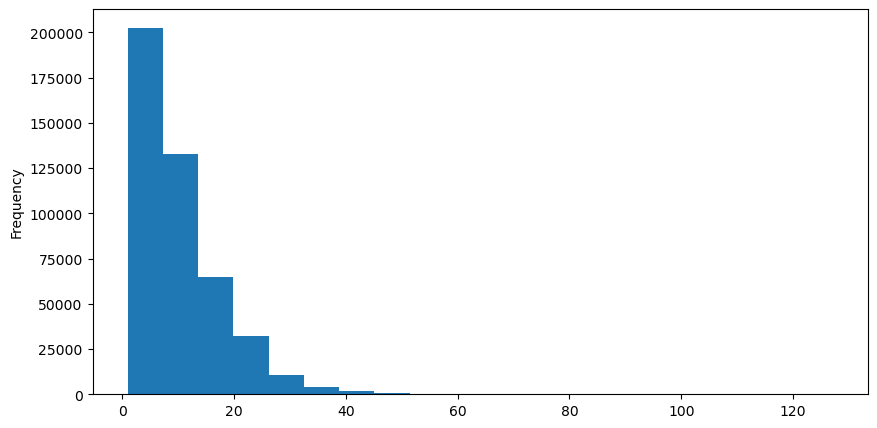

In [46]:
#display(df_order_products)
articulos_por_pedido = df_order_products.groupby(['order_id'])['product_id'].count()

display(articulos_por_pedido.describe())

plt.figure(figsize=(10,5))
articulos_por_pedido.plot(kind='hist',bins=20 )
plt.show()

Escribe aquí tus conclusiones

__En promedio las compradores llevan 5 articulos por compra__

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
reordered = df_order_products[df_order_products['reordered'] == 1]
merge_data = reordered.merge(df_products, on='product_id', how='left')
new_data = merge_data.groupby(['product_id','product_name'])['product_id'].count()\
                            .reset_index(name='count')\
                            .sort_values(['count'], ascending=False)\
                            .head(20)
display(new_data.loc[:,['product_id','product_name']])

,product_id,product_name
18104,24852,BANANA
9528,13176,BAG OF ORGANIC BANANAS
15368,21137,ORGANIC STRAWBERRIES
15936,21903,ORGANIC BABY SPINACH
34407,47209,ORGANIC HASS AVOCADO
34828,47766,ORGANIC AVOCADO
20285,27845,ORGANIC WHOLE MILK
34725,47626,LARGE LEMON
20375,27966,ORGANIC RASPBERRIES
12193,16797,STRAWBERRIES


Escribe aquí tus conclusiones

__Los clientes reinciden en comprar los mismo articulos, en este caso las primeras filas son las que reinciden en las compras de los clientes__

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [48]:
reordered = df_order_products[df_order_products['reordered'] == 1]
merge_data = reordered.merge(df_products, on='product_id', how='left')

proporcion_de_reincidencia = merge_data.groupby(['product_id','product_name'])['product_id'].mean()\
                            .reset_index(name='proporcion_de_reincidencia')


display(proporcion_de_reincidencia)

,product_id,product_name,proporcion_de_reincidencia
0,1,CHOCOLATE SANDWICH COOKIES,1.0
1,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,3.0
2,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,4.0
3,7,PURE COCONUT WATER WITH ORANGE,7.0
4,8,CUT RUSSET POTATOES STEAM N' MASH,8.0
...,...,...,...
36223,49690,HIGH PERFORMANCE ENERGY DRINK,49690.0
36224,49691,ORIGINAL PANCAKE & WAFFLE MIX,49691.0
36225,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,49692.0
36226,49693,SPRING WATER BODY WASH,49693.0


Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [49]:
reordered = df_order_products[df_order_products['reordered'] == 1]
merge_data = reordered.merge(df_instacart_orders, on='order_id', how='left')

proporcion_de_reincidencia = merge_data.groupby(['user_id'])['product_id'].mean()\
                            .reset_index(name='proporcion_de_reincidencia')


display(proporcion_de_reincidencia)

,user_id,proporcion_de_reincidencia
0,2,32792.000000
1,5,23904.250000
2,7,29721.230769
3,11,23280.000000
4,12,12763.000000
...,...,...
132986,206203,23839.166667
132987,206206,29316.533333
132988,206207,28025.048780
132989,206208,25452.057471


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [50]:
primer_articulo_data =  df_order_products[df_order_products['add_to_cart_order'] == 1]
merge_data = primer_articulo_data.merge(df_products, on='product_id', how='left')
new_data = merge_data.groupby(['product_id','product_name'])['product_id'].count()\
                            .reset_index(name='count')\
                            .sort_values(['count'], ascending=False)\
                            .head(20)
display(new_data)

,product_id,product_name,count
13414,24852,BANANA,15562
7127,13176,BAG OF ORGANIC BANANAS,11026
15028,27845,ORGANIC WHOLE MILK,4363
11384,21137,ORGANIC STRAWBERRIES,3946
25439,47209,ORGANIC HASS AVOCADO,3390
11786,21903,ORGANIC BABY SPINACH,3336
25732,47766,ORGANIC AVOCADO,3044
10622,19660,SPRING WATER,2336
9050,16797,STRAWBERRIES,2308
15102,27966,ORGANIC RASPBERRIES,2024


Escribe aquí tus conclusiones

__los Clintes principalmente compran bananas__

### Conclusion general del proyecto:

__Al parcer la tienda es pupular por vender bananas y los clientes reinciden en sus compras sobre este producto, dando notar que seria el producto estrella de la tienda.__